# QUIMB Visuals

This notebook creates visuals used in the presentation.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn

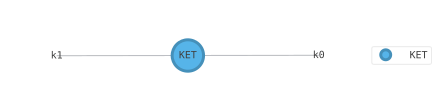

In [2]:
data = qu.bell_state('psi-').reshape(2, 2)
inds = ('k0', 'k1')
tags = ('KET',)

ket = qtn.Tensor(data=data, inds=inds, tags=tags)
ket.draw('KET')

In [3]:
type(ket)

quimb.tensor.tensor_core.Tensor

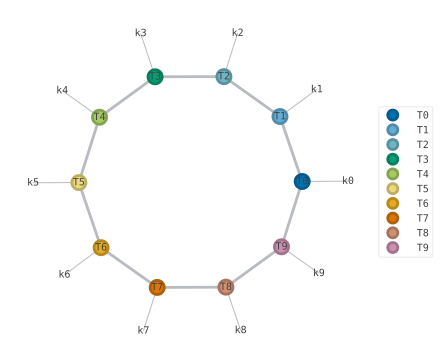

In [4]:
L = 10

# create the nodes, by default just the scalar 1.0
tensors = [qtn.Tensor(tags=f'T{i}') for i in range(L)]

for i in range(L):
    # add the physical indices, each of size 2
    tensors[i].new_ind(f'k{i}', size=2)
    
    # add bonds between neighbouring tensors, of size 7
    tensors[i].new_bond(tensors[(i + 1) % L], size=7)
    
mps = qtn.TensorNetwork(tensors)
mps.draw([f'T{i}' for i in range(L)])

In [5]:
type(mps)

quimb.tensor.tensor_core.TensorNetwork

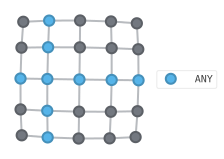

In [6]:
tn = qtn.TN2D_rand(5, 5, D=4)
tn.select(tags=['X2', 'Y3'], which='any').add_tag('ANY')
tn.draw('ANY', figsize=(3, 3))

In [7]:
type(tn)

quimb.tensor.tensor_2d.TensorNetwork2D

In [8]:
from tebd.matrix_product_states import MatrixProductState

In [9]:
N = 5
bond_dim = 10

In [10]:
mps = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

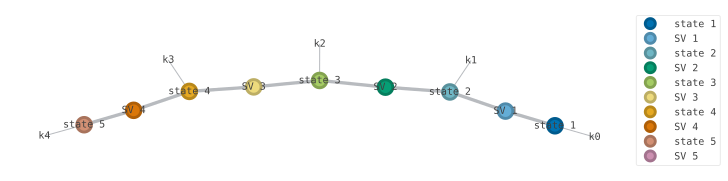

In [11]:
qtn.TensorNetwork(mps.data).draw(
    ['state 1', 'SV 1', 'state 2', 'SV 2', 'state 3', 'SV 3', 'state 4', 'SV 4', 'state 5', 'SV 5'],
    figsize=(10, 10)
)

In [12]:
import numpy as np

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.tebd import TEBD

In [13]:
loc_ham = LocalIsingHamiltonian(N=N)
glob_ham = IsingHamiltonian(N=N)

In [14]:
tebd_obj = TEBD(mps, loc_ham, glob_ham, bond_dim=bond_dim, evol_type="imag")

In [15]:
tau = 0.01
gate_idx = 1

In [16]:
two_site_gate = tebd_obj._gen_gate(tebd_obj.local_H.hamiltonians[gate_idx], tau)

In [17]:
left_site = mps.get_state(gate_idx)
right_site = mps.get_state(gate_idx + 1)
left_bond = mps.get_sv(gate_idx - 1)
central_bond = mps.get_sv(gate_idx)
right_bond = mps.get_sv(gate_idx + 1)

In [18]:
left_bond_T = qtn.Tensor(left_bond.data, inds=('f0', 'k1'), tags=['left bond'])
left_site_T = qtn.Tensor(left_site.data, inds=('k1', 'k2', 'k3'), tags=['left site'])
central_bond_T = qtn.Tensor(central_bond.data, inds=('k3', 'k4'), tags=['central bond'])
right_site_T = qtn.Tensor(right_site.data, inds=('k4', 'k5', 'k6'), tags=['right site'])
right_bond_T = qtn.Tensor(right_bond.data, inds=('k6', 'f3'), tags=['right bond'])
gate_T = qtn.Tensor(two_site_gate, inds=('f1', 'f2', 'k2', 'k5'), tags=['gate'])

In [19]:
TN = left_bond_T & gate_T & left_site_T & central_bond_T & right_site_T & right_bond_T

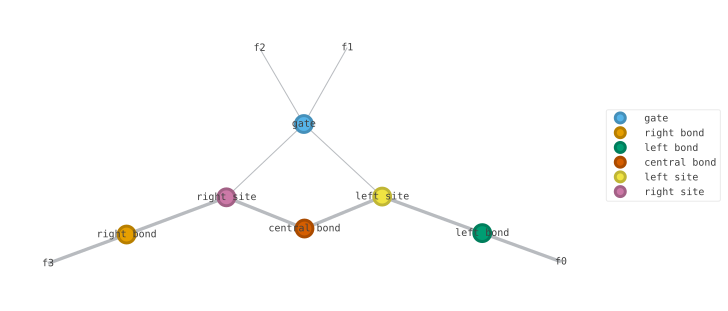

In [20]:
TN.draw(['gate', 'right bond', 'left bond', 'central bond', 'left site', 'right site'], figsize=(10, 10))

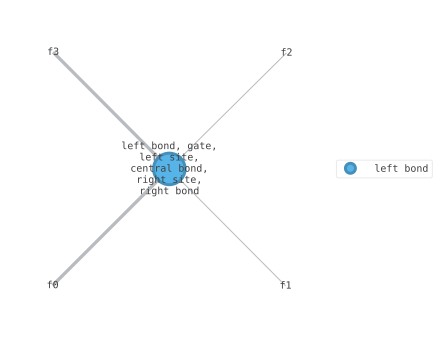

In [21]:
(TN ^ ...).draw(['left bond'])

In [22]:
left_bond_T = qtn.Tensor(left_bond.data, inds=('f0', 'k1'), tags=['left bond'])
left_site_T = qtn.Tensor(left_site.data, inds=('k1', 'f1', 'k3'), tags=['left site'])
central_bond_T = qtn.Tensor(central_bond.data, inds=('k3', 'k4'), tags=['central bond'])
right_site_T = qtn.Tensor(right_site.data, inds=('k4', 'f2', 'k6'), tags=['right site'])
right_bond_T = qtn.Tensor(right_bond.data, inds=('k6', 'f3'), tags=['right bond'])

In [23]:
TN = left_bond_T & left_site_T & central_bond_T & right_site_T & right_bond_T

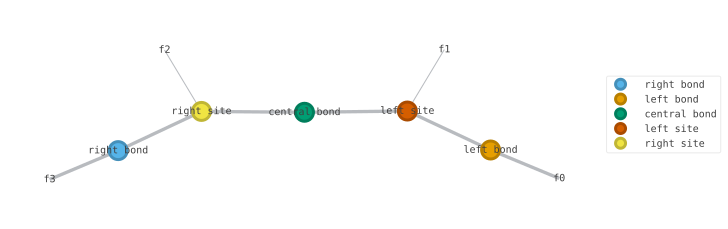

In [24]:
TN.draw(['right bond', 'left bond', 'central bond', 'left site', 'right site'], figsize=(10, 10))